In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import random

# Layer 1

In [20]:
grad_acc_run1 = torch.load("grad_acc_layer1.pt")

grad_acc_run2 = grad_acc_run1.copy()
for key in grad_acc_run2:
    grad_acc_run2[key] = [elt - random.random()*50 for elt in grad_acc_run1[key]] 

grad_acc_run3 = grad_acc_run1.copy()
for key in grad_acc_run3:
    grad_acc_run3[key] = [elt - random.random()*100 for elt in grad_acc_run1[key]] 

In [21]:
print(grad_acc_run1["epoch_0"])
print(grad_acc_run2["epoch_0"])
print(grad_acc_run3["epoch_0"])

[0.2835919260978699, 270.2017822265625, 33.253963470458984, 82.8811264038086, 18.547863006591797, 19.746294021606445, 7.440535545349121, 104.08514404296875, 29.533288955688477, 8.744194984436035, 9.905040740966797, 12.538965225219727, 76.00143432617188, 42.29697799682617, 3.7842483520507812, 9.785369873046875, 11.10537338256836, 36.529457092285156, 13.434879302978516, 20.322628021240234, 14.462198257446289, 18.18654441833496, 13.570134162902832, 4.473194599151611, 12.145231246948242, 3.2064368724823, 8.104411125183105, 7.380869388580322, 6.16607666015625, 5.697924613952637]
[-13.46864791187235, 224.11152462993996, -0.17705795288766524, 53.06738327200797, 12.250998043063749, -3.609512042952325, -11.952253491935341, 101.95253094548133, -2.739205999954237, -13.22816562610533, 5.836554690013001, -2.8884785645825932, 61.732709781688186, 16.94646604079316, -8.246907024882757, -18.045176375614332, -21.360389254620614, -3.1916378263148957, 4.8730010318912065, -3.2400404411028205, -24.654253671

In [22]:
mean_grad_acc = {}
std_grad_acc = {}

# Compute mean grad acc accros runs
for key1, key2, key3 in zip(grad_acc_run1, grad_acc_run2, grad_acc_run3):
    mean_grad_acc[key1] = np.mean([grad_acc_run1[key1], grad_acc_run2[key2], grad_acc_run3[key3]], axis=0)
    std_grad_acc[key1] = np.std([grad_acc_run1[key1], grad_acc_run2[key2], grad_acc_run3[key3]], axis=0)

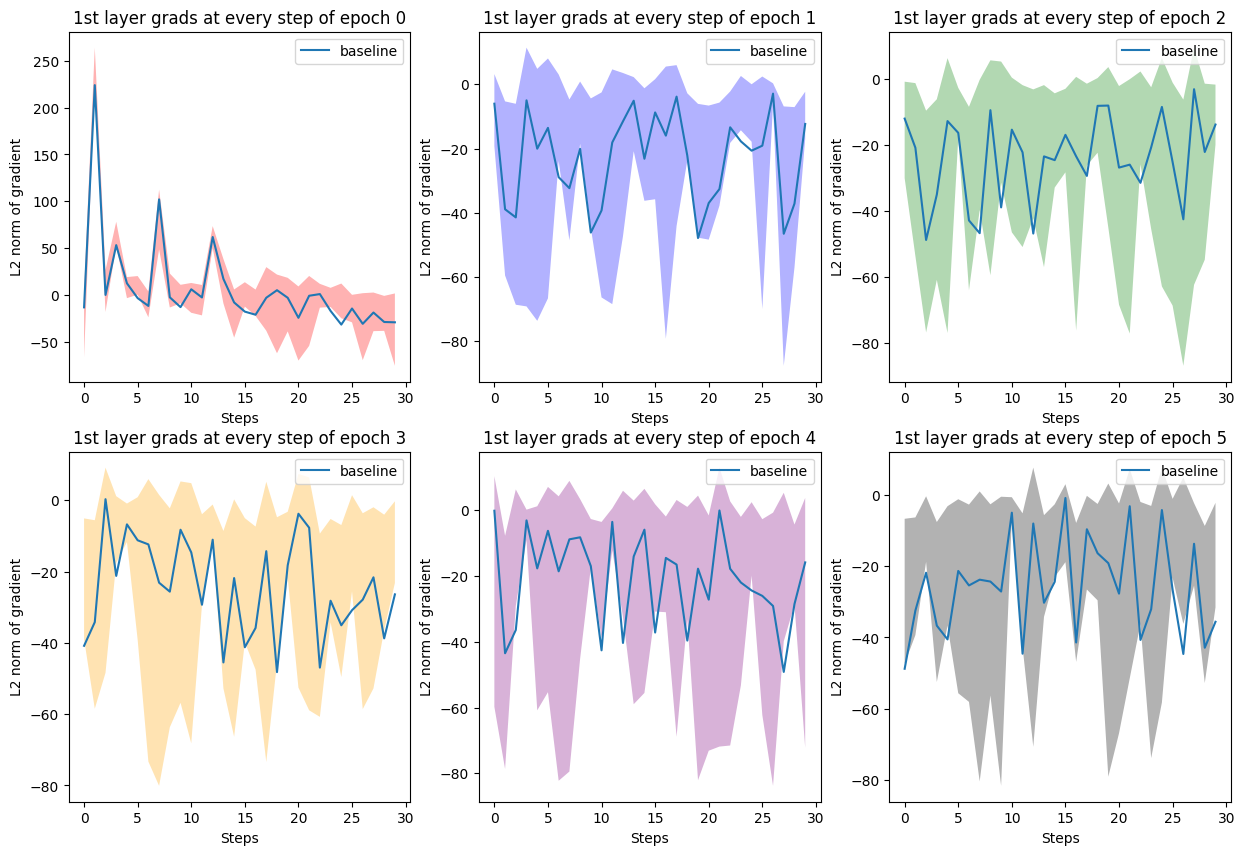

In [23]:
# ax.fill_between(prop_xy_list, sop_mean+sop_std, sop_mean-sop_std, facecolor='green', alpha=0.5)

colors = {"epoch_0": "red", "epoch_1": "blue", "epoch_2": "green", "epoch_3": "orange", "epoch_4": "purple", "epoch_5": "black"}

# Do same as above except create a new plot for each epoch and set into same grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
for i, key in enumerate(grad_acc_run2):
    x = np.arange(len(grad_acc_run1[key]))
    axs[i].plot(x, grad_acc_run2[key], label="baseline")
    #TODO: add other layer ablated

    axs[i].fill_between(
        x,
        mean_grad_acc[key] + std_grad_acc[key],
        mean_grad_acc[key] - std_grad_acc[key],
        facecolor=colors[key],
        alpha=0.3,
    )
    # Add legend "baseline"
    axs[i].legend()
    axs[i].set_xlabel("Steps")
    axs[i].set_ylabel("L2 norm of gradient")
    axs[i].set_title("1st layer grads at every step of epoch {}".format(key[-1]))
plt.show()
